# Specreduce 1D wavelength calibration example 1

**Author:** Hannu Parviainen </br>
**Modified:** 16 Jan. 2025

In [1]:
%matplotlib inline

In [2]:
import astropy.units as u
import numpy as np

from astropy.io.fits import getdata
from astropy.nddata import StdDevUncertainty
from matplotlib.pyplot import setp, subplots, close, rc
from specutils import Spectrum1D

from specreduce.lswavecal1d import WavelengthSolution1D

rc('figure', figsize=(11,3))

In [3]:
flux = getdata('shane_kast_blue_600_4310_d55.fits', 1).astype('d')
arc_spectrum = Spectrum1D(flux*u.DN, uncertainty=StdDevUncertainty(2*np.sqrt(flux)))

### Initialize the wavelength solution and find the lines

CPU times: user 81.1 ms, sys: 2.95 ms, total: 84 ms
Wall time: 84.9 ms


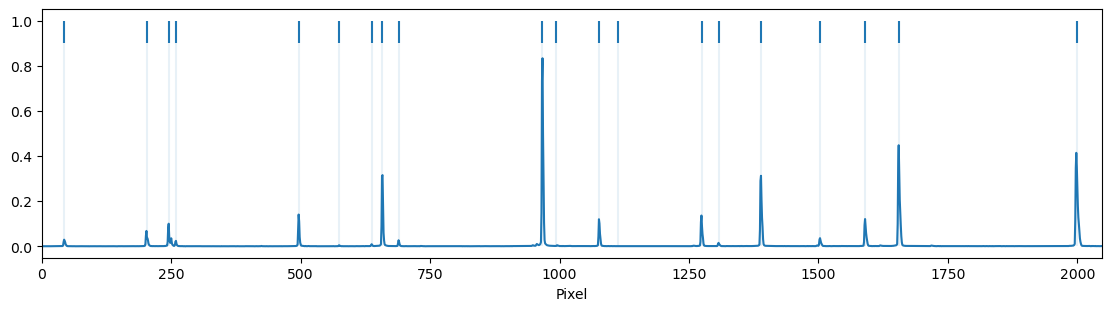

In [4]:
%%time
ws = WavelengthSolution1D(arc_spectra=arc_spectrum, line_lists=[['CdI', 'HgI', 'HeI']],  wlbounds=(3200, 5700))
ws.find_lines(fwhm=4)
ws.plot_lines();

### Fit a pixel-wavelength transformation using the observed and theoretical line lists

CPU times: user 493 ms, sys: 4.06 ms, total: 498 ms
Wall time: 498 ms


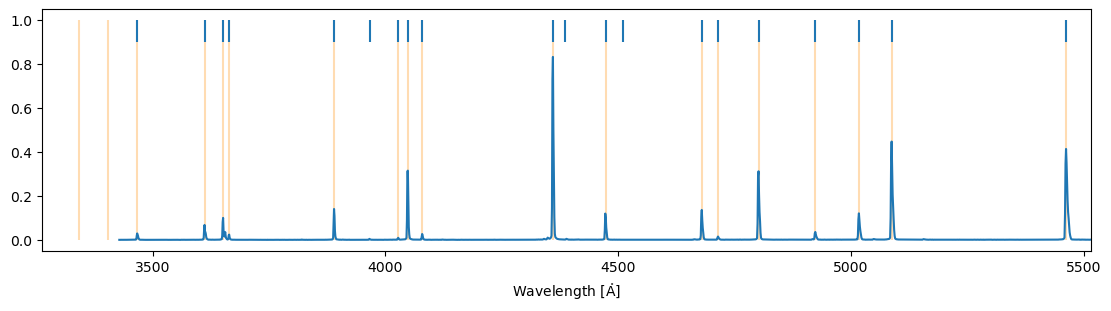

In [5]:
%%time
ws.fit(ref_pixel=1024, wavelength_bounds=(4400, 4500), dispersion_bounds=(1.0, 1.05), popsize=50)
ws.plot_solution();

### Plot the residuals

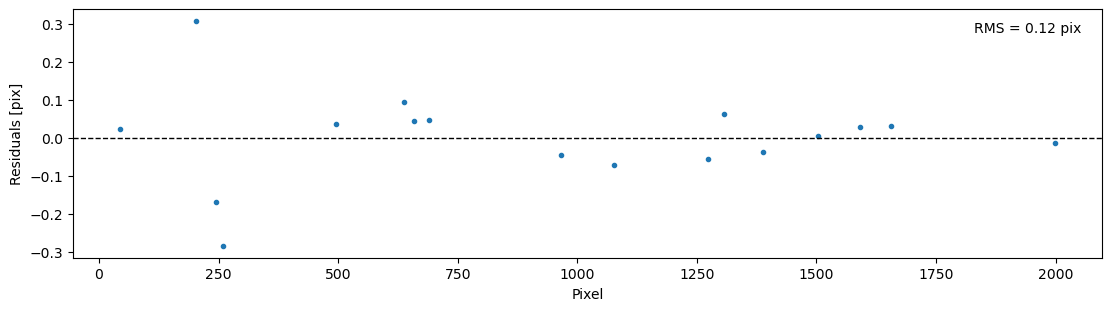

In [6]:
ws.plot_residuals(space='pixel');

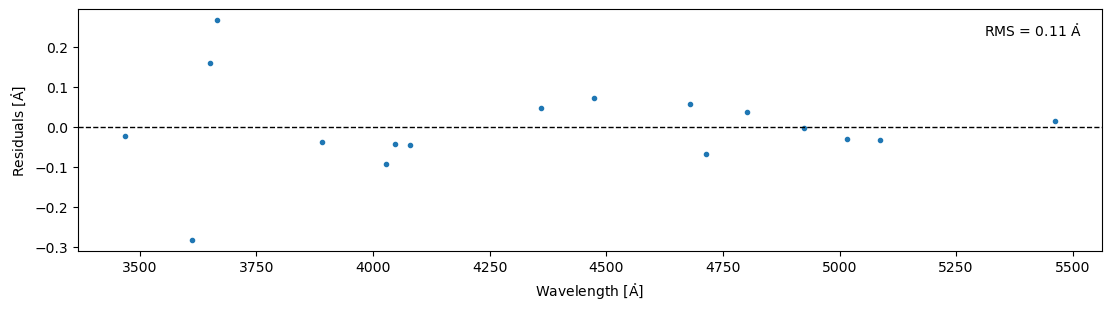

In [7]:
ws.plot_residuals(space='wavelength');

### Plot the transformations

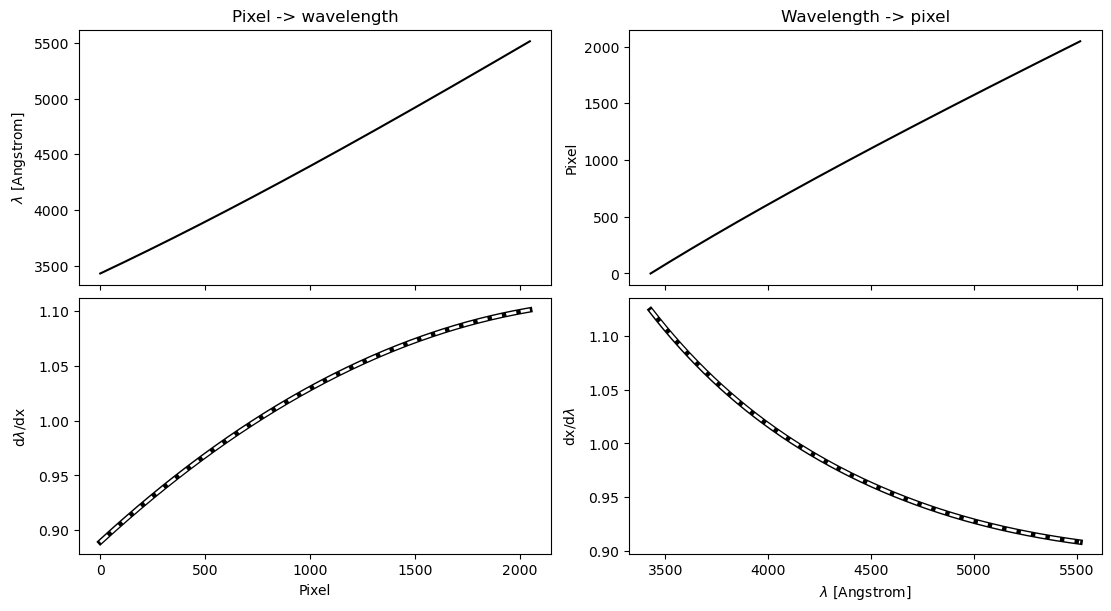

In [8]:
ws.plot_transforms(figsize=(11, 6));

### Rebin the spectrum to a linear spacing in wavelength space

CPU times: user 25.7 ms, sys: 5.92 ms, total: 31.6 ms
Wall time: 28.2 ms


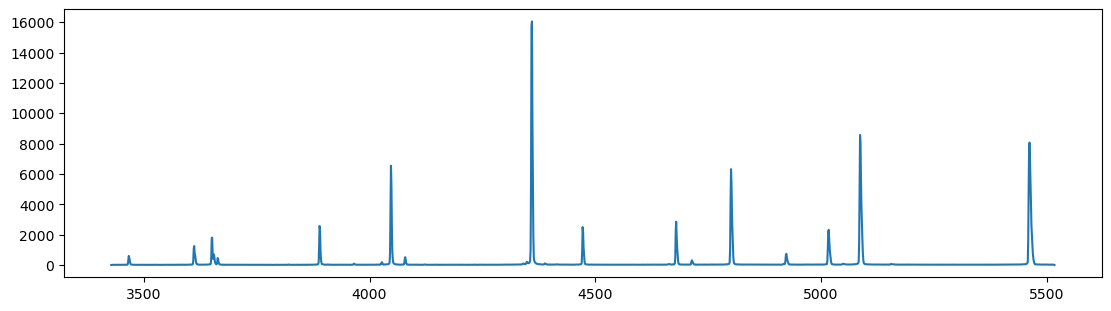

In [10]:
%%time
spectrum_wl = ws.resample(arc_spectrum)
fig, ax = subplots(constrained_layout=True)
ax.plot(spectrum_wl.spectral_axis, spectrum_wl.flux);

---